# Movie Recommender with Python

#### DF Capstone Project
##### Author: Richard V

### Importing Libraries

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from ast import literal_eval
from itertools import chain
import matplotlib.pyplot as plt
# Visualize clusters (2D PCA for simplicity)
from sklearn.decomposition import PCA


### Preprocessing the dataset
Here I explore the dataset, handling any null values or errors within the dataset, look for any correlations between variables and formatting the dataset for modelling later on.

In [2]:
df = pd.read_csv("10kmovies.csv")

In [3]:
df.head()

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum() #tagline,overview and release date have null values. Not interested in this so will drop them.

id                         0
title                      0
release_date              21
genres                     0
original_language          0
vote_average               0
vote_count                 0
popularity                 0
overview                  77
budget                     0
production_companies       0
revenue                    0
runtime                    0
tagline                 2759
dtype: int64

In [6]:
df.drop(columns = ['release_date','overview','tagline'], inplace = True) # Dropping the columns will null values.

In [7]:
df.isnull().sum()

id                      0
title                   0
genres                  0
original_language       0
vote_average            0
vote_count              0
popularity              0
budget                  0
production_companies    0
revenue                 0
runtime                 0
dtype: int64

In [8]:
df.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
0,758323,The Pope's Exorcist,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103
1,640146,Ant-Man and the Wasp: Quantumania,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125
2,502356,The Super Mario Bros. Movie,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92
3,868759,Ghosted,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120
4,594767,Shazam! Fury of the Gods,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130


In [9]:
df.shape

(10000, 11)

In [10]:
df.genres.unique()

array(["['Horror', 'Mystery', 'Thriller']",
       "['Action', 'Adventure', 'Science Fiction']",
       "['Animation', 'Adventure', 'Family', 'Fantasy', 'Comedy']", ...,
       "['Thriller', 'Drama', 'Music']",
       "['Fantasy', 'Animation', 'Action', 'Adventure', 'Science Fiction', 'Drama', 'Romance']",
       "['TV Movie', 'Fantasy', 'Animation', 'Action', 'Thriller', 'Science Fiction', 'Horror']"],
      dtype=object)

In [11]:
df.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
0,758323,The Pope's Exorcist,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103
1,640146,Ant-Man and the Wasp: Quantumania,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125
2,502356,The Super Mario Bros. Movie,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92
3,868759,Ghosted,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120
4,594767,Shazam! Fury of the Gods,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130


In [12]:
df.corr()

C:\Users\Richard\AppData\Local\Temp\ipykernel_1732\1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,vote_average,vote_count,popularity,budget,revenue,runtime
id,1.000000,-0.241569,-0.259859,0.102688,-0.243411,-0.207591,-0.256838
vote_average,-0.241569,1.000000,0.253543,0.040162,0.074849,0.149643,0.388440
vote_count,-0.259859,0.253543,1.000000,0.069693,0.600121,0.753206,0.288462
popularity,0.102688,0.040162,0.069693,1.000000,0.143257,0.148195,0.038973
budget,-0.243411,0.074849,0.600121,0.143257,1.000000,0.735239,0.282498
revenue,-0.207591,0.149643,0.753206,0.148195,0.735239,1.000000,0.253162
runtime,-0.256838,0.388440,0.288462,0.038973,0.282498,0.253162,1.000000


In [13]:
df.dtypes

id                        int64
title                    object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
dtype: object

In [15]:
df.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
0,758323,The Pope's Exorcist,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103
1,640146,Ant-Man and the Wasp: Quantumania,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125
2,502356,The Super Mario Bros. Movie,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92
3,868759,Ghosted,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120
4,594767,Shazam! Fury of the Gods,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130


In [16]:
action_movies = df[df['genres'].str.contains('Action')] # will output rows with action genre in them

In [17]:
action_movies = df[df['genres'] == 'Action']# will output rows with ONLY action genre in them. - there are none.

In [18]:
action_movies

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime


In [19]:
# Convert string representations to actual lists
df['genres'] = df['genres'].apply(literal_eval)


          id                              title  \
0     758323                The Pope's Exorcist   
1     640146  Ant-Man and the Wasp: Quantumania   
2     502356        The Super Mario Bros. Movie   
3     868759                            Ghosted   
4     594767           Shazam! Fury of the Gods   
...      ...                                ...   
9995  374473                    I, Daniel Blake   
9996   16774  Hellboy Animated: Sword of Storms   
9997   13564    Return to House on Haunted Hill   
9998  482204             My Sister-in-law's Job   
9999  444539                       The Bookshop   

                                                 genres original_language  \
0                           [Horror, Mystery, Thriller]           English   
1                  [Action, Adventure, Science Fiction]           English   
2       [Animation, Adventure, Family, Fantasy, Comedy]           English   
3                             [Action, Comedy, Romance]           English   
4 

In [55]:
df.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime,cluster,pca_1,pca_2,genres_str
0,758323,The Pope's Exorcist,"[Horror, Mystery, Thriller]",English,7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,16,-0.550987,0.659233,"Horror, Mystery, Thriller"
1,640146,Ant-Man and the Wasp: Quantumania,"[Action, Adventure, Science Fiction]",English,6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,12,0.528225,0.853065,"Action, Adventure, Science Fiction"
2,502356,The Super Mario Bros. Movie,"[Animation, Adventure, Family, Fantasy, Comedy]",English,7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,13,1.644505,-0.256500,"Animation, Adventure, Family, Fantasy, Comedy"
3,868759,Ghosted,"[Action, Comedy, Romance]",English,7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120,2,0.442997,-0.214940,"Action, Comedy, Romance"
4,594767,Shazam! Fury of the Gods,"[Action, Comedy, Fantasy, Adventure]",English,6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,14,1.085168,0.332984,"Action, Comedy, Fantasy, Adventure"


In [21]:
# Flatten the lists and convert to Series
flattened_series = pd.Series(chain.from_iterable(df['genres']))

# Get unique genres
unique_genres = flattened_series.unique()

print(unique_genres)

['Horror' 'Mystery' 'Thriller' 'Action' 'Adventure' 'Science Fiction'
 'Animation' 'Family' 'Fantasy' 'Comedy' 'Romance' 'Drama' 'History' 'War'
 'Crime' 'Music' 'Western' 'TV Movie' 'Documentary']


In [22]:
len(unique_genres) #This will be my k cluster number

19

### Basic Model

So the essential idea of my movie recommender is to generate a list of movies to the user based on their genre of interest.

In [57]:
#Create a user prompt.
user_interest = input("Please enter a genre of interest: ")

In [ ]:
#loop through the unique genres. If the user interest 

C:\Users\Richard\Anaconda june 2023\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


          id                              title  \
0     758323                The Pope's Exorcist   
1     640146  Ant-Man and the Wasp: Quantumania   
2     502356        The Super Mario Bros. Movie   
3     868759                            Ghosted   
4     594767           Shazam! Fury of the Gods   
...      ...                                ...   
9995  374473                    I, Daniel Blake   
9996   16774  Hellboy Animated: Sword of Storms   
9997   13564    Return to House on Haunted Hill   
9998  482204             My Sister-in-law's Job   
9999  444539                       The Bookshop   

                                                 genres original_language  \
0                           [Horror, Mystery, Thriller]           English   
1                  [Action, Adventure, Science Fiction]           English   
2       [Animation, Adventure, Family, Fantasy, Comedy]           English   
3                             [Action, Comedy, Romance]           English   
4 

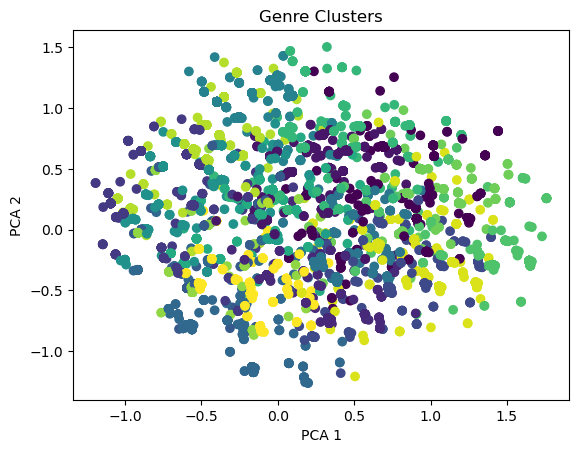

In [34]:
# Convert genres to binary encoding
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(df['genres'])

# Choose the number of clusters
num_clusters = 19

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
df['cluster'] = kmeans.fit_predict(genre_matrix)

# Print the results
print(df)



pca = PCA(n_components=2)
pca_result = pca.fit_transform(genre_matrix)
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

plt.scatter(df['pca_1'], df['pca_2'], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Genre Clusters')
plt.show()

In [ ]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 25):  # Trying up to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(genre_matrix)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans.inertia_

12038.782817832122

In [35]:
!pip install scikit-surprise

     -------------------------------------- 772.0/772.0 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-win_amd64.whl size=1080967 sha256=cff28936ff680b6fbbc942aab6731e177c1cee8d2dd79443201291b9e7d396f3
  Stored in directory: c:\users\richard\appdata\local\pip\cache\wheels\df\e4\a6\7ad72453dd693f420b0c639bedeec34641738d11b55d8d9b84
Successfully built scikit-surprise


In [30]:
from sklearn.metrics import silhouette_score

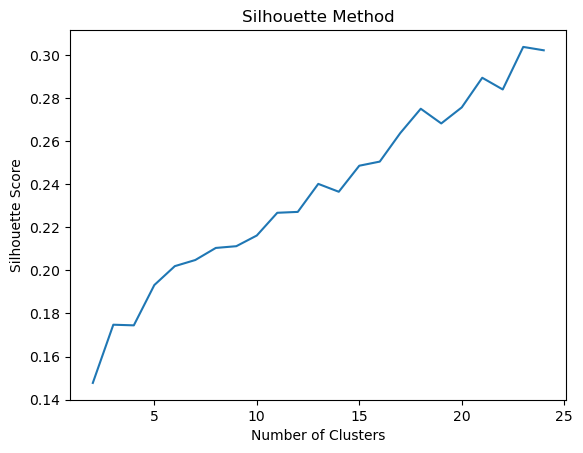

In [33]:
# List to store silhouette scores
silhouette_scores = []

# Determine silhouette scores for different numbers of clusters
for n_clusters in range(2, 25):  # Trying 2 to 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(genre_matrix)
    silhouette_avg = silhouette_score(genre_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, 25), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Get user's input
user_interest = input("Enter your interest in a movie genre: ")

# Find movies with similar genres using the recommender model
similar_movies = []
for movie_id, genres in zip(df['movie_id'], df['genres']):
    if user_interest in genres:
        similar_movies.append(movie_id)

if not similar_movies:
    print("No movies found matching your interest.")
else:
    print("Recommended movies based on your interest:")
    for movie_id in similar_movies:
        movie_title = df[df['movie_id'] == movie_id]['title'].values[0]
        print(movie_title)

In [36]:
df.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime,cluster,pca_1,pca_2
0,758323,The Pope's Exorcist,"[Horror, Mystery, Thriller]",English,7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,16,-0.550987,0.659233
1,640146,Ant-Man and the Wasp: Quantumania,"[Action, Adventure, Science Fiction]",English,6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,12,0.528225,0.853065
2,502356,The Super Mario Bros. Movie,"[Animation, Adventure, Family, Fantasy, Comedy]",English,7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,13,1.644505,-0.256500
3,868759,Ghosted,"[Action, Comedy, Romance]",English,7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120,2,0.442997,-0.214940
4,594767,Shazam! Fury of the Gods,"[Action, Comedy, Fantasy, Adventure]",English,6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,14,1.085168,0.332984


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
# User input for genre of interest
user_interest = input("Enter your interest in a movie genre: ")

# Convert list genres to string for TF-IDF vectorization
df['genres_str'] = df['genres'].apply(', '.join)

# Vectorize genres using TF-IDF
vectorizer = TfidfVectorizer()
genre_matrix = vectorizer.fit_transform(df['genres_str'])

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):  # Trying 2 to 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(genre_matrix)
    silhouette_avg = silhouette_score(genre_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Choose the optimal number of clusters
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

# Perform K-Means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(genre_matrix)

# Get movies in the same cluster as the user's interest
user_cluster = kmeans.predict(vectorizer.transform([user_interest]))
recommended_movies = df[df['title'] != user_interest][cluster_labels == user_cluster[0]]

# Print recommended movies
print("Recommended movies based on your interest:")
print(recommended_movies['title'].tolist())

C:\Users\Richard\Anaconda june 2023\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Richard\Anaconda june 2023\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Richard\Anaconda june 2023\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Richard\Anaconda june 2023\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ric

Recommended movies based on your interest:
['The Last Kingdom: Seven Kings Must Die', 'Adrenaline', 'Supercell', 'Prizefighter: The Life of Jem Belcher', 'Sisu', 'Sniper: The White Raven', 'Encanto at the Hollywood Bowl', 'Gold Run', 'The Woman King', 'Sayen', 'Medieval', 'All Quiet on the Western Front', 'Devotion', 'Ip Man: The Awakening', '3-D Sex and Zen: Extreme Ecstasy', 'Uncharted', 'Lord of the Streets', 'Hacksaw Ridge', 'Two Sinners and a Mule', 'Teen Wolf: The Movie', 'Orgasm Inc: The Story of OneTaste', 'Cocaine Bear: The True Story', 'Wolf Hound', 'Tetris', 'The Battle at Lake Changjin: Water Gate Bridge', 'Air', 'Hidden Figures', 'Fury', 'Brothers', 'American Sniper', 'The Trapped 13: How We Survived The Thai Cave', 'Overdose', 'Chernobyl: Abyss', 'Mary Magdalene', 'Snake Beauty', 'Harry Potter 20th Anniversary: Return to Hogwarts', "Tom Clancy's Without Remorse", 'The Boy in the Striped Pyjamas', 'Apocalypto', 'The Hip Hop Nutcracker', 'Elvis', 'Za gyakutai: Nyotai ikedor

In [45]:
# Count the number of recommended movies that contain the user's interest
recommended_with_interest = sum(any(user_interest in genre for genre in genres) for genres in recommended_movies['genres'])

# Print recommended movies and the count
print("Recommended movies based on your interest:")
print(recommended_movies['title'].tolist())
print(f"Number of recommended movies with your interest: {recommended_with_interest}")


Recommended movies based on your interest:
['The Last Kingdom: Seven Kings Must Die', 'Adrenaline', 'Supercell', 'Prizefighter: The Life of Jem Belcher', 'Sisu', 'Sniper: The White Raven', 'Encanto at the Hollywood Bowl', 'Gold Run', 'The Woman King', 'Sayen', 'Medieval', 'All Quiet on the Western Front', 'Devotion', 'Ip Man: The Awakening', '3-D Sex and Zen: Extreme Ecstasy', 'Uncharted', 'Lord of the Streets', 'Hacksaw Ridge', 'Two Sinners and a Mule', 'Teen Wolf: The Movie', 'Orgasm Inc: The Story of OneTaste', 'Cocaine Bear: The True Story', 'Wolf Hound', 'Tetris', 'The Battle at Lake Changjin: Water Gate Bridge', 'Air', 'Hidden Figures', 'Fury', 'Brothers', 'American Sniper', 'The Trapped 13: How We Survived The Thai Cave', 'Overdose', 'Chernobyl: Abyss', 'Mary Magdalene', 'Snake Beauty', 'Harry Potter 20th Anniversary: Return to Hogwarts', "Tom Clancy's Without Remorse", 'The Boy in the Striped Pyjamas', 'Apocalypto', 'The Hip Hop Nutcracker', 'Elvis', 'Za gyakutai: Nyotai ikedor

In [47]:
recommended_with_interest

369

In [49]:
len(recommended_movies)

1184

In [50]:
# Get movie titles of recommended movies with interest
recommended_titles_with_interest = recommended_movies[recommended_movies['genres_str'].str.contains(user_interest)]['title']

# Print recommended movie titles
print("Recommended movies based on your interest:")
print(recommended_titles_with_interest.tolist())

Recommended movies based on your interest:
['The Last Kingdom: Seven Kings Must Die', 'Adrenaline', 'Supercell', 'Sisu', 'Sniper: The White Raven', 'Gold Run', 'The Woman King', 'Sayen', 'Medieval', 'Ip Man: The Awakening', '3-D Sex and Zen: Extreme Ecstasy', 'Uncharted', 'Lord of the Streets', 'Two Sinners and a Mule', 'Teen Wolf: The Movie', 'Wolf Hound', 'The Battle at Lake Changjin: Water Gate Bridge', 'Fury', 'American Sniper', 'Overdose', 'Chernobyl: Abyss', "Tom Clancy's Without Remorse", 'Apocalypto', 'Hansan: Rising Dragon', 'The princess', 'Your Boyfriend Is Mine', "Guy Ritchie's The Covenant", 'Snake Eyes: G.I. Joe Origins', 'K: Seven Stories Movie 1 - R:B - Blaze', 'Vendetta', 'The Vault', 'Battle for Saipan', 'Exodus: Gods and Kings', 'Heaven & Earth', 'Tombstone', 'Gladiator', 'The Marksman', 'Mission: Impossible - Fallout', 'Hercules', 'War Horse', 'Raiders of the Lost Ark', 'Ford v Ferrari', 'The Magnificent Seven', 'Indiana Jones and the Dial of Destiny', 'Werewolf by 

In [52]:
len(recommended_titles_with_interest)

369

In [53]:
recommended_titles_with_interest

10              The Last Kingdom: Seven Kings Must Die
21                                          Adrenaline
32                                           Supercell
48                                                Sisu
67                             Sniper: The White Raven
                             ...                      
9759                                    Beyond the Law
9841                                   The Lost Viking
9885                         BloodRayne 2: Deliverance
9952                                       Ground Zero
9967    Lupin the Third: The Secret of Twilight Gemini
Name: title, Length: 369, dtype: object

In [54]:
recommended_movies[recommended_movies['genres_str'].str.contains(user_interest)]

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime,cluster,pca_1,pca_2,genres_str
10,948713,The Last Kingdom: Seven Kings Must Die,"[Action, Adventure, History, Drama, War]",English,7.3,317,1436.725,0,['Carnival Films'],0,111,5,-0.130526,0.211211,"Action, Adventure, History, Drama, War"
21,1048300,Adrenaline,[Action],English,5.9,39,717.878,0,[],0,75,1,0.093779,0.474661,Action
32,842945,Supercell,[Action],English,6.3,142,510.509,0,"['Thomasville Pictures', 'Highland Film Group'...",0,100,1,0.093779,0.474661,Action
48,840326,Sisu,"[War, Action]",Finnish,7.1,36,455.546,6200000,"['Subzero Film Entertainment', 'Good Chaos', '...",6603810,91,1,0.066249,0.468161,"War, Action"
67,966220,Sniper: The White Raven,"[War, Action, Drama]",Ukrainian,7.5,371,257.922,1000000,['UM Group'],0,120,5,-0.430663,0.064735,"War, Action, Drama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9759,650272,Beyond the Law,[Action],English,5.8,64,11.476,7000000,"['UFO Pictures', 'Scotty Gelt', 'BondIt']",0,90,1,0.093779,0.474661,Action
9841,526746,The Lost Viking,"[Action, Adventure, History]",English,6.4,149,10.543,0,[],0,103,1,0.393916,0.621137,"Action, Adventure, History"
9885,17456,BloodRayne 2: Deliverance,"[Action, Horror, Western]",English,4.2,204,9.282,10000000,"['Boll Kino Beteiligungs GmbH & Co. KG', 'Brig...",167445,99,1,-0.005922,0.641998,"Action, Horror, Western"
9952,845264,Ground Zero,[Action],Korean,6.5,4,10.169,0,"['Gorilla 8 Productions', 'Nova Film']",0,9,1,0.093779,0.474661,Action
